# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)
 3. Moving Average [Here](https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa)
 4. Finding the best model's parameters
 5. Predictions

3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [1]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
## load parameters
# scaler = MinMaxScaler(feature_range=(0, 1))

# set figure size
rcParams['figure.figsize'] = 12, 7

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv') #,  index_col='Date', parse_dates=['Date'], date_parser=dateparse)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


### 2. Exploratory Data Analysis (EDA)

Workspace details [here](https://github.com/erojaso/Forecasting-Stock-Prices/blob/master/01_workspace_stock_price_forecast_eda.ipynb)

The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

### 2.1 General view

In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)

Text(0, 0.5, 'USD')

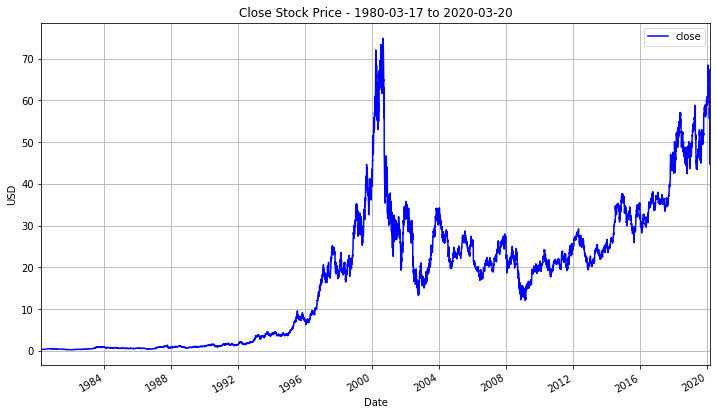

In [6]:
# plot close over time
rcParams['figure.figsize'] = 12, 7
ax = df.plot(y='close', style='b-', grid=True, title='Close Stock Price - 1980-03-17 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [7]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1984 until the present. Values older than 3 years will not be considered in this preliminary investigation. Part of this decision is based on the historical values shown from the origin 1980 until late of 2017. Therefore, observations with more than 3 years will be removed.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [8]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)

In [9]:
# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2021, 1, 31)

# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [10]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 4)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 4 columns):
open     538 non-null float64
high     538 non-null float64
low      538 non-null float64
close    538 non-null float64
dtypes: float64(4)
memory usage: 21.0 KB
None

 First data rows:


,open,high,low,close
date,,,,
2018-01-31,49.230,49.25,47.5600,48.14
2018-02-01,47.695,48.47,47.4500,47.65
2018-02-02,47.320,47.79,46.1000,46.15
2018-02-05,46.350,47.26,44.5000,44.52
2018-02-06,44.020,44.93,43.0302,44.91


In [11]:
df_adj.describe()

,open,high,low,close
count,538.000000,538.000000,538.000000,538.000000
mean,51.373111,51.989972,50.795581,51.392565
std,5.179134,5.152480,5.196410,5.197871
min,43.350000,44.280000,42.040000,42.420000
25%,47.415000,47.996250,46.785000,47.382500
50%,50.510000,51.255000,50.000000,50.730000
75%,54.355000,54.737500,53.800000,54.355000
max,67.630000,69.290000,67.310000,68.470000


The adjustment of the proposed data returns 538 observacions and the 'mean' around 51+/-0.95 and 'standard deviation' of 5+/-0.01. Also the minimum and maximum value changed have been moved for the dependent variable 'Close Price' from: minimum (from 0.21 to 42.42) and maximum (from 74.88 to 68.47).

These could be preliminary clues to a stationary series, the data are clustered, and it is difficult to support this hypothesis.

Text(0, 0.5, 'USD')

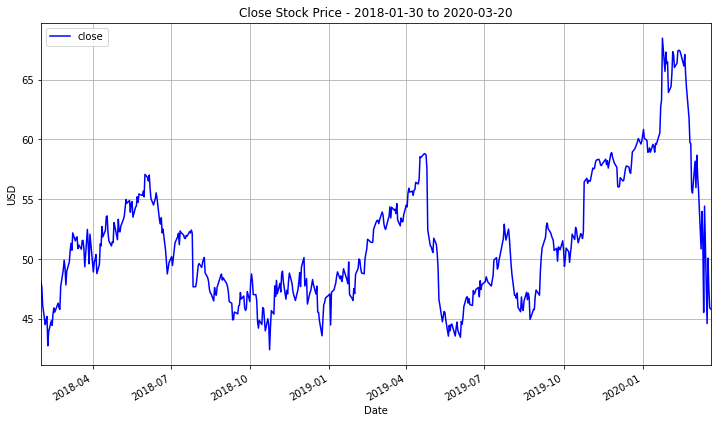

In [12]:
# plot close over time - after adjustments
rcParams['figure.figsize'] = 12, 7
ax = df_adj.plot(y='close', style='b-', grid=True, title='Close Stock Price - 2018-01-30 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

Therefore we need to ensure that our 'is not stationary' series. Under this scenary, we need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

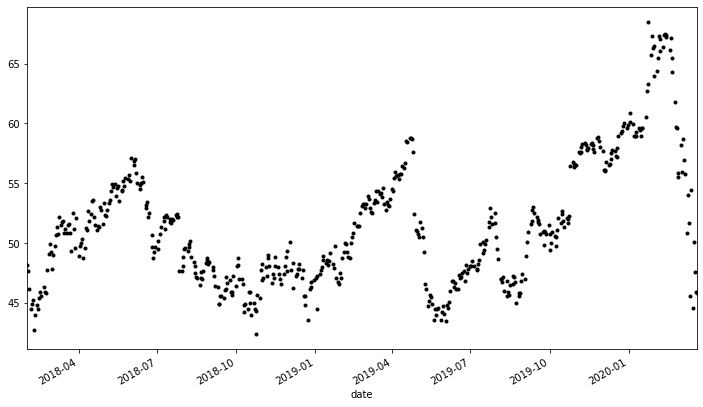

In [13]:
# plot the scatterplot:
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

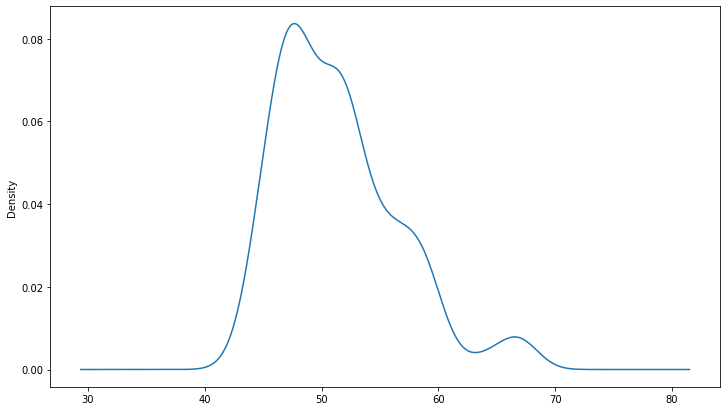

In [14]:
# Distribution of the dataset
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(kind='kde')

We can observe a distribution close to a normal distribution (bell curve) with a slight bias to its right on the closing values. This will possibly require us to adjust the values during data cleaning.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

### 2.2 Time Series Decomposition

In [15]:
# remove volume attribute
df_adj.drop('open', axis=1, inplace=True)
df_adj.drop('high', axis=1, inplace=True)
df_adj.drop('low', axis=1, inplace=True)

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_adj, model='multiplicative', period=12)

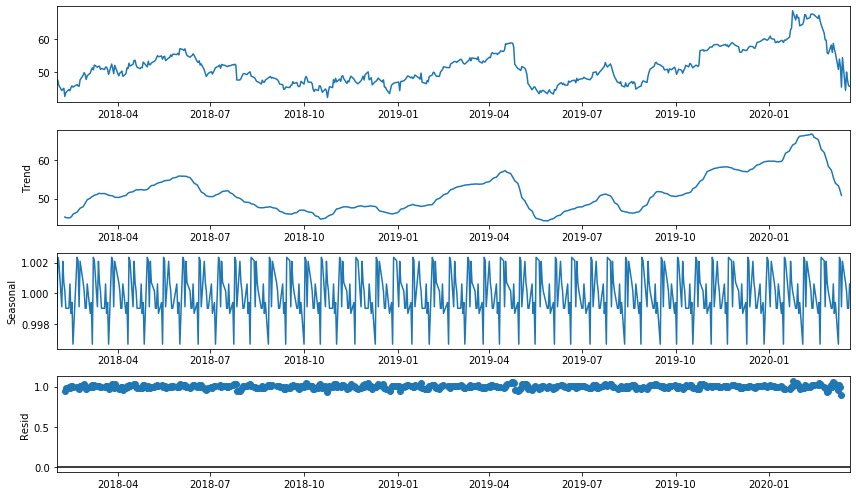

In [17]:
rcParams['figure.figsize'] = 12, 7
result.plot()
plt.show()

This activity provides us with more information about our data set, and the actual behavior for the actions under study.
No definite 'trend' is observed in the data, on the contrary a recurrent event is easily observable (5 times per year), with easily identifiable minimums and maximums.

### 2.3 Stationarising the time series.

We need to check if a series is stationary or not. For this purpose we will use the ADF (Augmented Dickey-Fuller) Test, which is used to determine the presence of 'unit root' in the series, and hence help us understand if theseries is stationary or not. The null and alternate hypothesis of this test is:
- **Null Hypothesis**: The series `has a unit root` (value of a =1)
- **Alternate Hypothesis**: The series `has no unit root`.

In [18]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    rcParams['figure.figsize'] = 10, 7
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test
    print("Results of dickey fuller test\n")

    adft = adfuller(timeseries['close'], autolag='AIC')

    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics',
                                        'pvalue',
                                        'No. of lags used',
                                        'Number of observations used'])

    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    
    print(output)

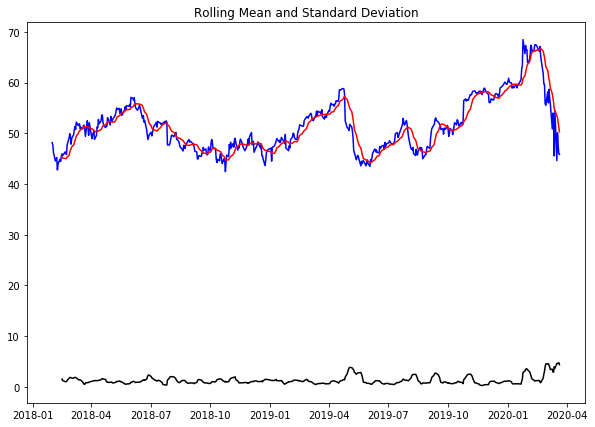

Results of dickey fuller test

Test Statistics                 -3.017741
pvalue                           0.033270
No. of lags used                10.000000
Number of observations used    527.000000
critical value (1%)             -3.442820
critical value (5%)             -2.867040
critical value (10%)            -2.569699
dtype: float64


In [19]:
test_stationarity(df_adj)

Through the above graph, we can see the highly variable mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.03 (0.033270) so we cannot not reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

To get a stationary series, we need to eliminate the trend and seasonality from the series.

We start by taking a log of the series to reduce the magnitude of the values and reduce the trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean 'close price' value at every point further ahead in series.


#### 3. Moving Average

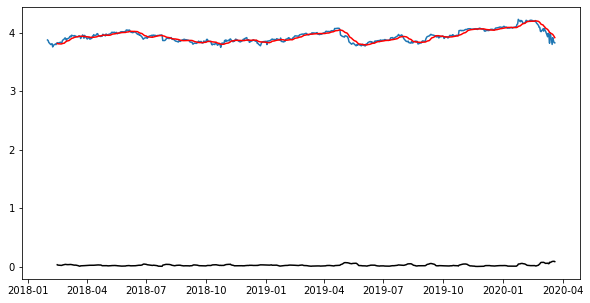

In [20]:
# reduce the magnitude of the values and reduce the trend in the series
df_log = np.log(df_adj)

# get rolling average
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

rcParams['figure.figsize'] = 10, 5
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.

This way, we eliminate trends out of a series and obtain a more stationary series.

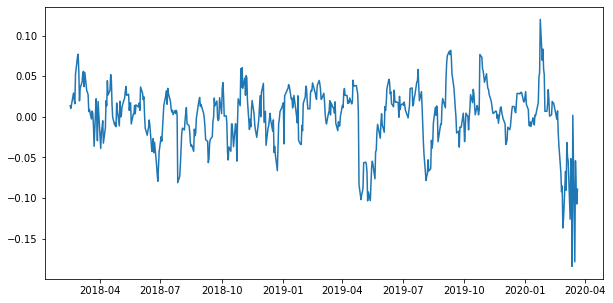

In [21]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

rcParams['figure.figsize'] = 10, 5
plt.plot(df_log_moving_avg_diff)
plt.show()

Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.

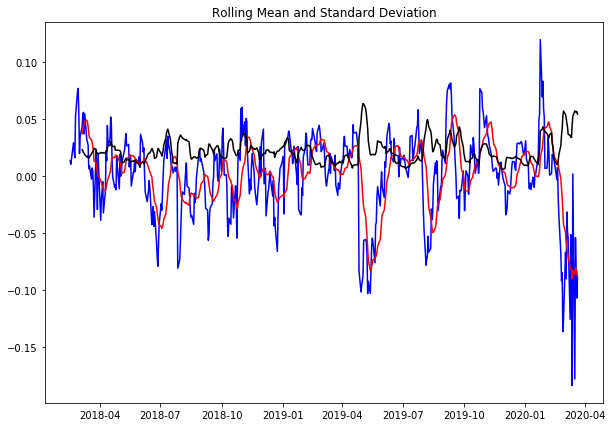

Results of dickey fuller test

Test Statistics                 -4.915020
pvalue                           0.000033
No. of lags used                10.000000
Number of observations used    516.000000
critical value (1%)             -3.443087
critical value (5%)             -2.867158
critical value (10%)            -2.569762
dtype: float64


In [22]:
rcParams['figure.figsize'] = 10, 5
test_stationarity(df_log_moving_avg_diff)

In the graph above, we note that the data **did not attained stationarity**.

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. 

In [23]:
weighted_average = df_log.ewm(halflife=12,
                              min_periods=0,
                              adjust=True).mean()

The exponential moving average (EMA) **is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period**. In other words, the formula gives recent prices more weight than past prices.

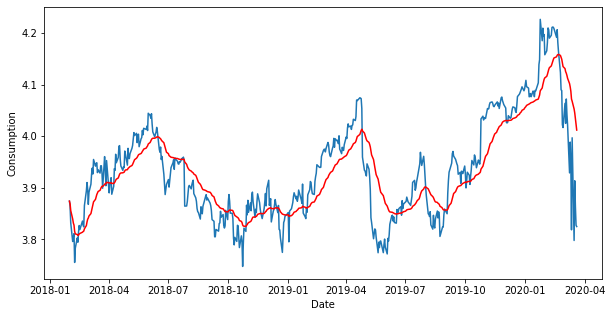

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")

#plt.legend()
plt.show(block =False)

Using the moving average data in (df_log), we will subtract the average weight (weighted_average) and perform the Dickey-Fuller (ADFT) test once again.

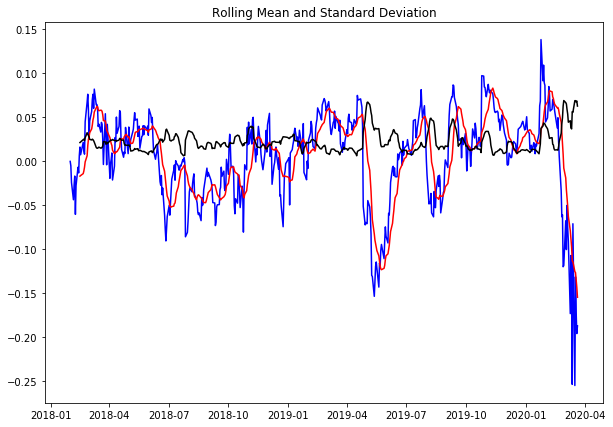

Results of dickey fuller test

Test Statistics                 -3.438950
pvalue                           0.009701
No. of lags used                10.000000
Number of observations used    527.000000
critical value (1%)             -3.442820
critical value (5%)             -2.867040
critical value (10%)            -2.569699
dtype: float64


In [25]:
rcParams['figure.figsize'] = 10,5
logScale_weightedMean = df_log-weighted_average
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data **not attained stationarity**. We also see that the test statistics (Test Statistics -3.438950) and critical value (critical value (1%) -3.442820) is relatively equal.

There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also remove the seasonality in the series. One such method for this task is differencing.

#### 3.1 Differencing Technique

Differencing is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called 'temporal dependence'. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality. Differencing is performed by subtracting the previous observation from the current observation.

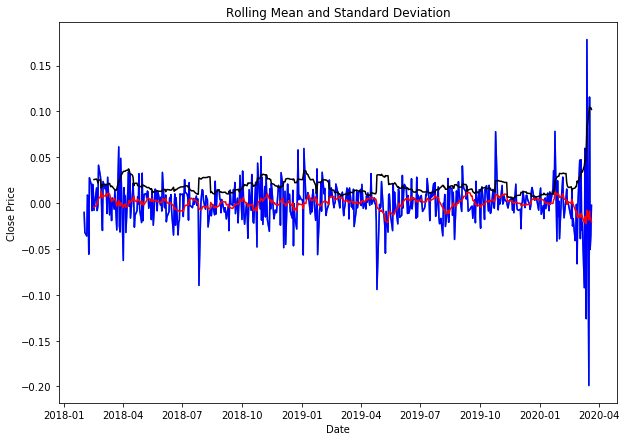

Results of dickey fuller test

Test Statistics                 -5.562146
pvalue                           0.000002
No. of lags used                 9.000000
Number of observations used    527.000000
critical value (1%)             -3.442820
critical value (5%)             -2.867040
critical value (10%)            -2.569699
dtype: float64


In [26]:
df_log_diff = df_log - df_log.shift()

plt.title("Shifted Time Series")
plt.xlabel("Date")
plt.ylabel("Close Price")
rcParams['figure.figsize'] = 10,5
plt.plot(df_log_diff)

# Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)

test_stationarity(df_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Finally, perform the Dickey-Fuller test (ADFT) once again.

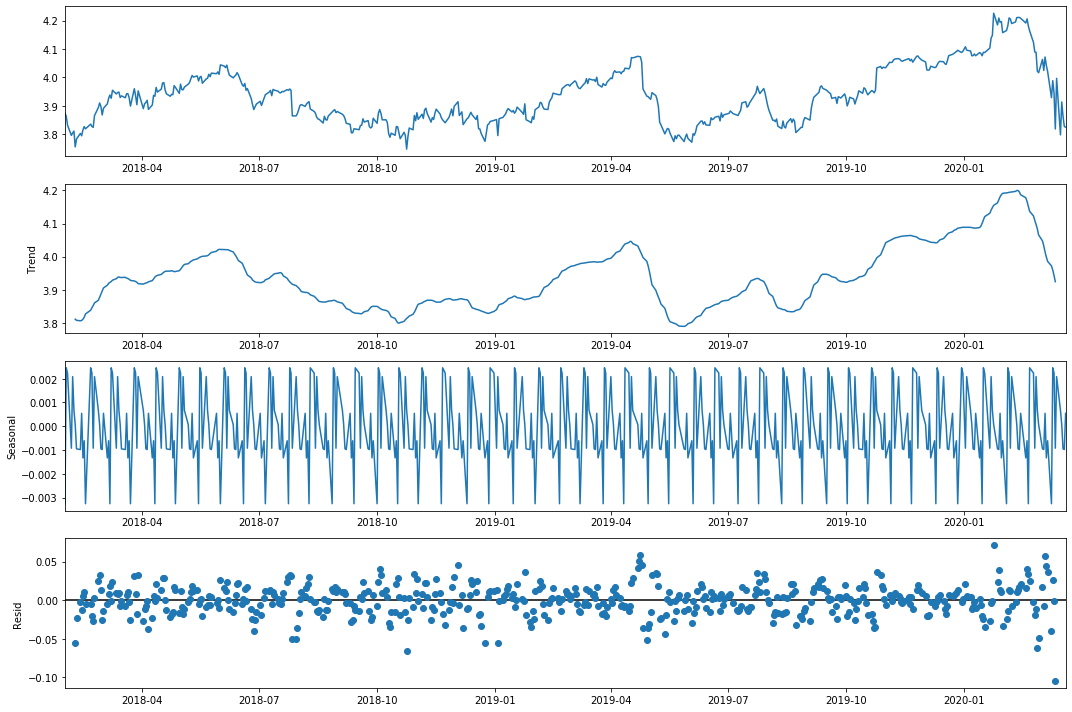

In [27]:
result = seasonal_decompose(df_log, model='additive', freq = 12)

rcParams['figure.figsize'] = 15,10
result.plot()
plt.show()

After decomposition we can see in the residual (Resid) that we clearly have a flat line for the standard deviation and the mean. At this point we can ensure that our series is stationary and now we can move to find the best parameters for our model.

#### Decomposition Details

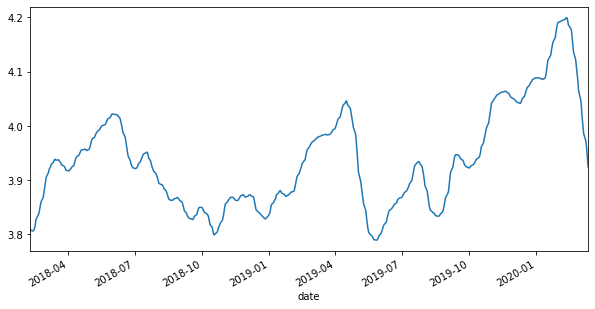

In [28]:
trend = result.trend
trend.dropna(inplace=True)

rcParams['figure.figsize'] = 10,5
trend.plot()
plt.show()

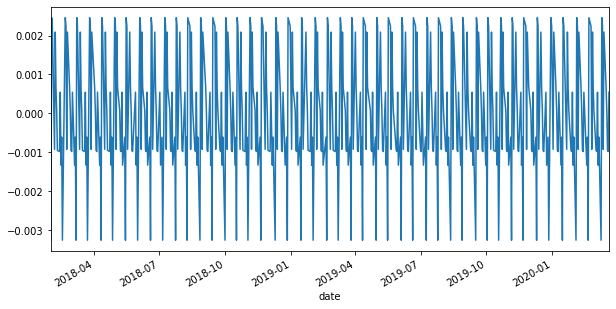

In [29]:
seasonality = result.seasonal
seasonality.dropna(inplace=True)

rcParams['figure.figsize'] = 10,5
seasonality.plot()
plt.show()

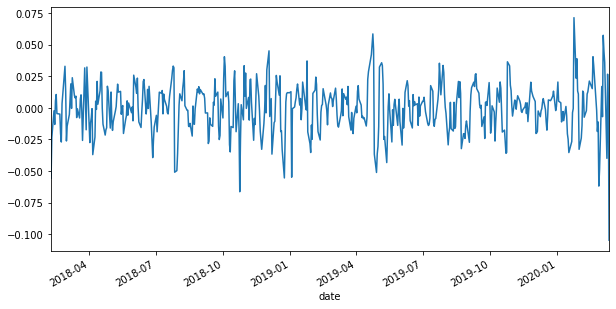

In [30]:
residual = result.resid
residual.dropna(inplace=True)

rcParams['figure.figsize'] = 10,5
residual.plot()
plt.show()

In [31]:
residual.columns=['Date', 'Close']
residual.head(10)

date
2018-02-08   -0.055690
2018-02-09   -0.023513
2018-02-12   -0.002288
2018-02-13   -0.013092
2018-02-14    0.005546
2018-02-15    0.010660
2018-02-16   -0.004470
2018-02-20   -0.004876
2018-02-21   -0.020378
2018-02-22   -0.027010
Name: resid, dtype: float64

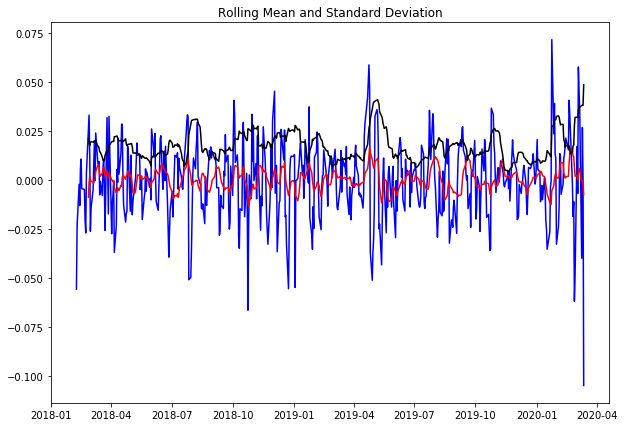

Results of dickey fuller test



KeyError: 'close'

In [32]:
test_stationarity(residual)

### 4. Finding the best model's parameters

Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.

A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:

- p → Number of autoregressive terms,
- d → Number of nonseasonal differences needed for stationarity, and
- q → Number of lagged forecast errors in the prediction equation.

Values of p and q come through ACF and PACF plots.

In [33]:
# we use d value here(df_log_diff)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15, method='ols')

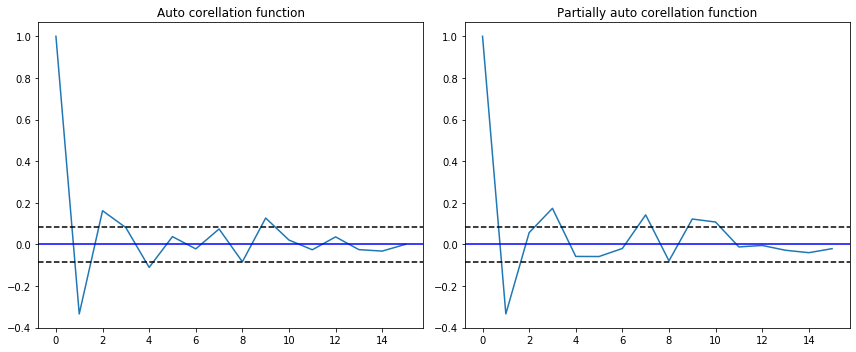

In [35]:
#plot PACF
rcParams['figure.figsize'] = 12,5
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle='-', color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)), linestyle='--', color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)), linestyle='--', color='black')
plt.title('Auto Corellation Function')
plt.tight_layout()

#plot ACF
rcParams['figure.figsize'] = 12,5
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--', color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--', color='black')
plt.title('Partially Auto Corellation Function')
plt.tight_layout()

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to '1' where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

In [1]:
# less the RSS more effective the model is
#model = ARIMA(df_log, order=(2,1,0)) # RSS : 0.283976
#model = ARIMA(df_log, order=(2,1,2)) # RSS : 0.272588
#model = ARIMA(df_log, order=(3,1,2)) # RSS : 0.272586
#model = ARIMA(df_log, order=(3,1,3)) # RSS : 0.272558
#model = ARIMA(df_log, order=(3,1,1)) # RSS : 0.275016
#model = ARIMA(df_log, order=(1,1,1)) # RSS : 0.284440**
model = ARIMA(df_log, order=(1,1,0)) # RSS : 0.284440**
result_AR = model.fit(disp = 0)

rcParams['figure.figsize'] = 15,8
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")

# less the RSS more effective the model is
print('RSS : %f' %sum((result_AR.fittedvalues - df_log_diff["close"])**2))

NameError: name 'ARIMA' is not defined

The lower the RSS value, the more effective the model is.

### 5. Predictions

The following code helps us to forecast 'close price' for the next 90 days.

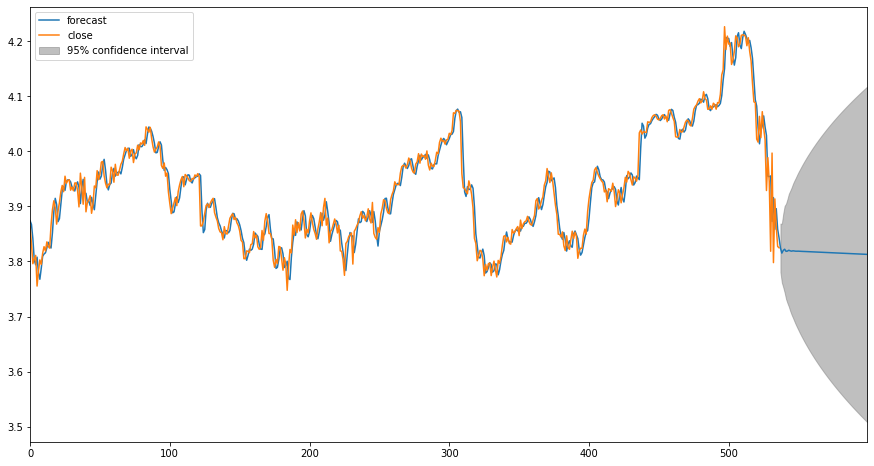

In [67]:
rcParams['figure.figsize'] = 15,8
result_AR.plot_predict(1, 600)
x = result_AR.forecast(steps=200)

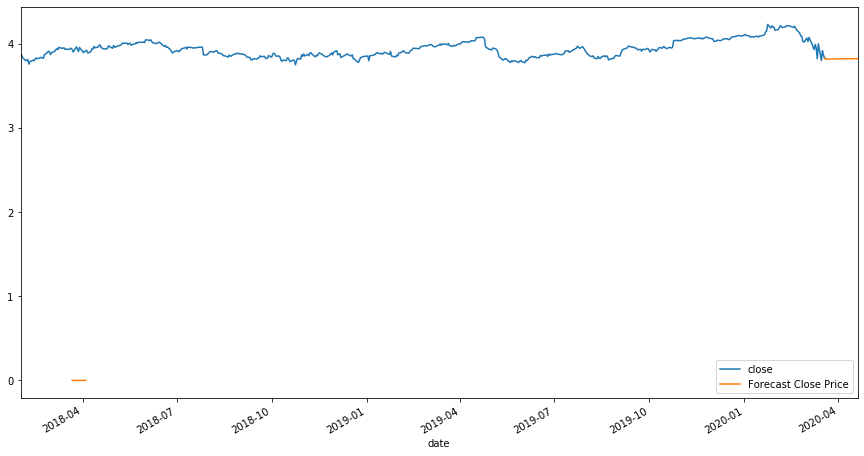

In [95]:
# forecast electricity consumption for next 4 months

future=df_log
future=future.reset_index()
mon = future["date"]
mon = mon+pd.DateOffset(months=1)
future_dates = mon[-7-1:]
future = future.set_index('date')
newDf = pd.DataFrame(index=future_dates, columns=future.columns)
future = pd.concat([future,newDf])
future["Forecast Close Price"]= result_AR.predict(start=35, end =43, dynamic=True)
future["Forecast Close Price"].iloc[-10:]=result_AR.forecast(steps=10)[0]
future[['close','Forecast Close Price']].plot()

In [100]:
df_log

,close
date,
2018-01-31,3.874113
2018-02-01,3.863883
2018-02-02,3.831897
2018-02-05,3.795939
2018-02-06,3.804660
...,...
2020-03-16,3.797958
2020-03-17,3.913622
2020-03-18,3.863043


In [101]:
# we founded the predicted values in the above code and we need to print the values in the form of series
ARIMA_predicts = pd.Series(result_AR.fittedvalues,copy=True)
ARIMA_predicts.head()

# finding the cummulative sum
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())

ARIMA_predicts_log = pd.Series(df_log['close'],index = df_log.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

date
2018-02-01   -0.000117
2018-02-02    0.003149
2018-02-05    0.012720
2018-02-06    0.019573
2018-02-07    0.008964
dtype: float64
date
2018-01-31    3.874113
2018-02-01    3.863766
2018-02-02    3.835046
2018-02-05    3.808658
2018-02-06    3.824233
dtype: float64


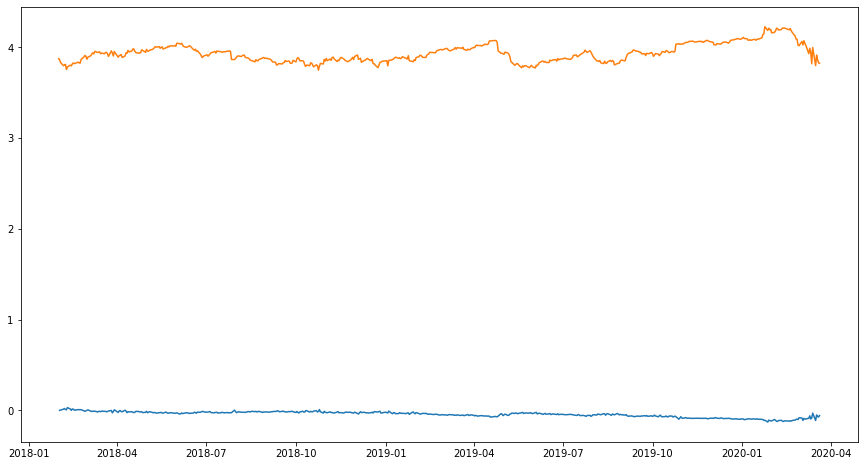

In [106]:
# converting back to the exponential form results in getting back to the original data.
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=15,8
plt.plot(ARIMA_predicts_cumsum)
plt.plot(df_log)

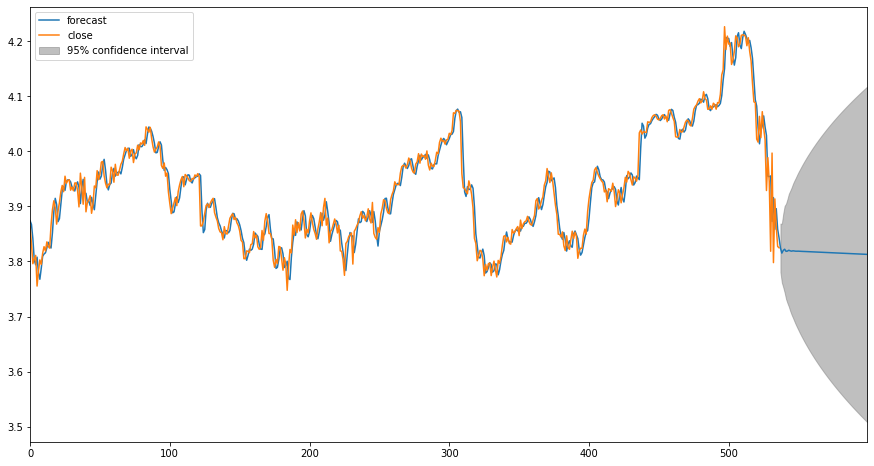

In [107]:
#future prediction
result_AR.plot_predict(1,600)
x=result_AR.forecast(steps=200)